## Project Overview
- you are assigned to classify images from Keras CIFAR data set
- The images in this data set are colored and are in are of different objects, Cats, Dogs, planes etc.
- Create a convolutional Neural Network that will accurately classfiy and predict these images
- Becauce of a long training process use an AWS clous computing instance to train this model. 
- Save the model once you feel the accuracy is resonable 

## Project Approach 
- Import data from keras library
- Scale the data to a normal distribution 
- One hot incode the labels for the images 
- Reshpe the train and test data 
- Create the model setting padding,kernal size, stride size ,and proper input shape 
- Rememr to flatten the images for the model
- Get the matrics on the model after saving as well as test on a new image

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Shape observaiton 
- we have 60,0000 images total
- color dimentions are 3 due to color images
- the dimntions are accurate so we will not need to reshape these images

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

## Scaling the images 
- Normalize the images 
- The images will range between 0 and 255 in color so we wil ned this number to normalize the images
- we will see that the dimentions do not change
- The image will also still be the same using a normalized distribution

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
x_train.shape

(50000, 32, 32, 3)

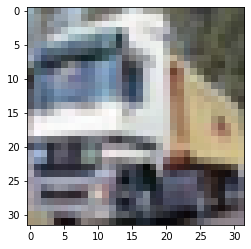

In [9]:
plt.imshow(x_train[1])

### Lets one hot encode the labels
- This will prevent our model from confusing the classification values from a continuous value
- we have 10 unique labels -> do images -> hense cifar-10 name for data set

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train)

In [12]:
y_cat_train.shape

(50000, 10)

In [13]:
y_cat_test = to_categorical(y_test)

#### Creating the Model 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D,Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

## Early Stopping
- Used to prevent over training

In [15]:
32 *32*3

3072

In [16]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=5)

In [17]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = "valid",
                strides = (1,1), input_shape = (32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = "valid",
                strides = (1,1), input_shape = (31,31,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 400, activation = "relu"))
model.add(Dense (units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

### Fitting Model
- Will use aws EC2 instance to fit this model and import the model for time sake

In [18]:
model.fit(x_train, y_cat_train, validation_data=(x_test,y_cat_test), epochs=20, callbacks=[stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.3913 - accuracy: 0.4999 - val_loss: 1.1332 - val_accuracy: 0.6059
Epoch 2/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.0139 - accuracy: 0.6416 - val_loss: 0.9469 - val_accuracy: 0.6700
Epoch 3/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8553 - accuracy: 0.6985 - val_loss: 0.9323 - val_accuracy: 0.6737
Epoch 4/20
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.7293 - accuracy: 0.7439 - val_loss: 0.8866 - val_accuracy: 0.6933
Epoch 5/20
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.6119 - accuracy: 0.7870 - val_loss: 0.8658 - val_accuracy: 0.7081
Epoch 6/20
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.5070 - accuracy: 0.8246 - val_loss: 0.8562 - val_accuracy: 0.7204
Epoch 7/20
50000/50000 [==============================] 

## Model performance

In [19]:
metrics = pd.DataFrame(model.history.history)

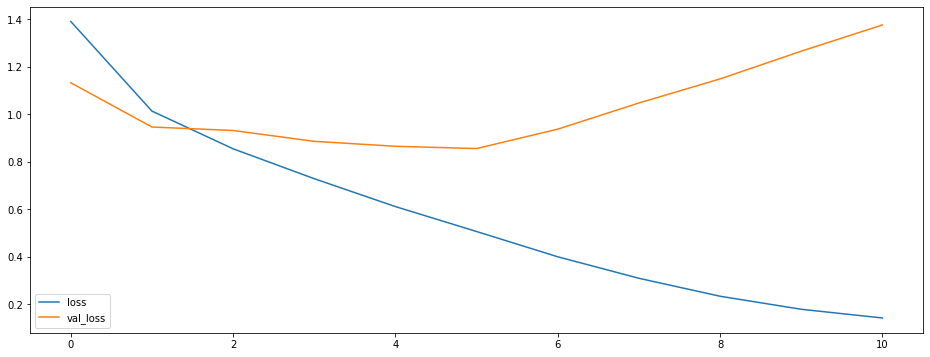

In [20]:
metrics[["loss","val_loss"]].plot(figsize = (16,6))

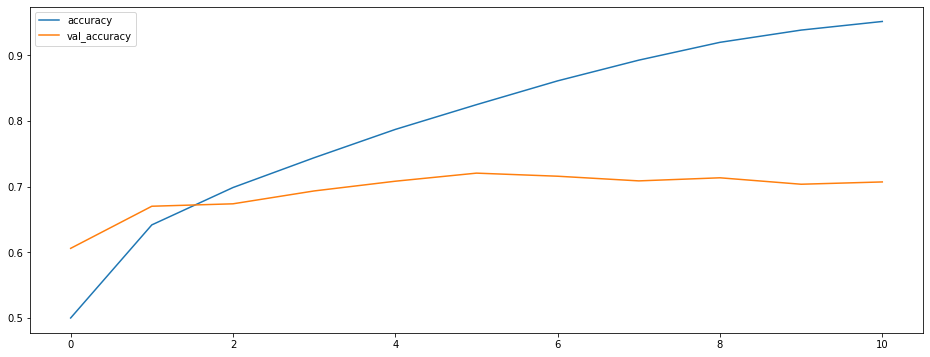

In [21]:
metrics[["accuracy","val_accuracy"]].plot(figsize = (16,6))

In [22]:
model.save("Cifar-10.h5")

In [23]:
predictions = model.predict_classes(x_test)

### Metrics for predicitons 
- Model predicts round 72 percent
- This is accually good since a random guess stands to be around 10% accurate

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.79      0.84      0.82      1000
           2       0.65      0.56      0.60      1000
           3       0.50      0.56      0.53      1000
           4       0.72      0.55      0.62      1000
           5       0.64      0.55      0.59      1000
           6       0.68      0.87      0.77      1000
           7       0.75      0.78      0.77      1000
           8       0.79      0.83      0.81      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [26]:
print(confusion_matrix(y_test,predictions))

[[787  21  40  16   8   5  16  14  68  25]
 [ 23 844   8  12   1   5  16   4  29  58]
 [ 72   6 564  92  63  52  91  40  12   8]
 [ 39  17  63 564  47 115  82  34  20  19]
 [ 25   8  80  96 548  46  95  81  19   2]
 [ 19   6  45 209  34 549  63  57  13   5]
 [  3   6  29  49  14  12 870   4   8   5]
 [ 19   5  25  47  33  54  15 782   7  13]
 [ 58  46   6  19   7   4  12   5 829  14]
 [ 44 110   6  16   3  11  14  20  43 733]]


In [27]:
print(explained_variance_score(y_test, predictions))

0.39565275272727274


### Testing on random image

In [51]:
from random import randint
random_index = randint(1, len(x_train))
img = x_train[random_index]

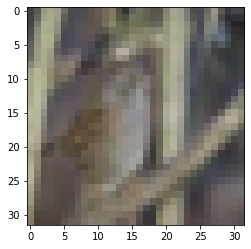

In [52]:
plt.imshow(img)

In [53]:
model.predict_classes(img.reshape(1,32,32,3))

array([2])

### True Value 

In [54]:
y_train[random_index]

array([2], dtype=uint8)